In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')

mpl.rc('xtick', labelsize = 24) 
mpl.rc('ytick', labelsize = 24)

In [40]:
colors = ['#2a9d8f', '#e76f51', '#eba75f', '#2f4f4f']

In [41]:
PATH_TO_DATA = '/Users/ulyanadupletsa/Documents/KN/results_10years'

In [42]:
lbs = ['network_SNR', 'mass_1', 'mass_2', 'luminosity_distance', 'dec', 'ra', 'theta_jn',
	   'psi', 'geocent_time', 'phase', 'redshift', 'lambda_1', 'lambda_2', 'err_mass_1', 
	   'err_mass_2', 'err_luminosity_distance', 'err_dec', 'err_ra', 'err_theta_jn',
	   'err_psi', 'err_geocent_time', 'err_phase', 'err_lambda_1', 'err_lambda_2', 'err_sky_location']

In [43]:
eos_list = ['BLh_uniform', 'APR4_uniform',
        'BLh_gaussian','APR4_gaussian']
leg_titles = ['BLh - Uniform', 'APR4 - Uniform',
            'BLh - Gaussian', 'APR4 - Gaussian']

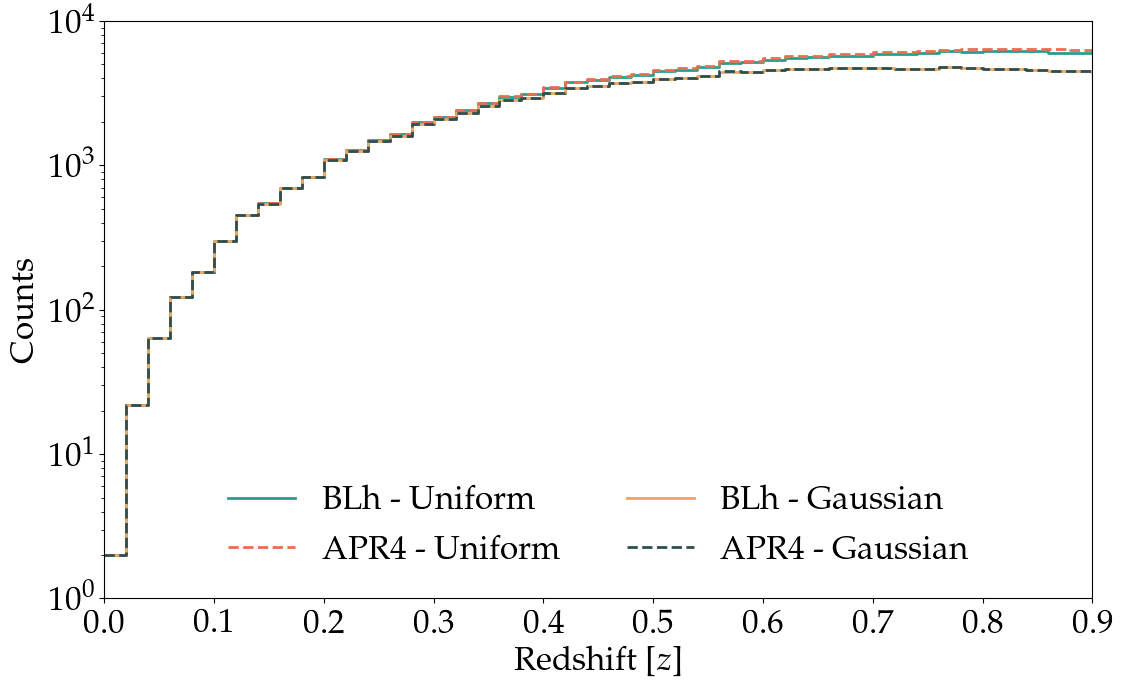

In [44]:
alpha = '1.0'
sel_detector = 'ET_delta_10_cryo'

my_alpha = 0.1
my_linewidth = 2.
bin_width = 0.02

# make a 2x2 plot comparing the 2 EOS and 2 mass models
fig, ax = plt.subplots(1, 1, figsize=(12.75, 7.5), sharex=True, sharey=True)

for i, eos in enumerate(eos_list):
    data = pd.read_csv('%s/%s/%s/%s/Errors_%s_%s_%s.txt' %(str(PATH_TO_DATA), str(alpha), str(eos), 
                        str(sel_detector), str(alpha), str(eos), str(sel_detector)),
                        names = lbs, skiprows = 1, delimiter = ' ')
    if i%2 == 0:
        my_linestyle = 'solid'
    else:
        my_linestyle = 'dashed'
    sns.histplot(x = data['redshift'], bins = np.arange(0, 1, bin_width), ax=ax, color = colors[i], fill=False, 
                 element='step', linewidth=my_linewidth, linestyle=my_linestyle)

ax.set_xlabel('Redshift [$z$]', fontsize=24)
ax.set_ylabel('Counts', fontsize=24)
ax.set_yscale('log')
ax.set_ylim(1, 1e4)
ax.set_xlim(0, 0.9)

ax.legend(leg_titles, fontsize=24, loc='lower center', ncol = 2, frameon=False)

plt.savefig('plots/kn_et_delta_eos_cfr_alpha%s.pdf' %alpha, bbox_inches='tight')
plt.show()